In [265]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### **🛩 Import libraries and dataset**
****

1. Import libraries necessary and dataset

In [266]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from itertools import combinations 
from scipy import stats 

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier 



In [267]:
train = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/train.csv")
test = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/test.csv")

train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


2. Drop the 2 unecessary columns which are id and unmamed: 0

In [268]:
train.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)
test.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)

3. Create a table the outlines some information on our train data including: Count, unique, frequency, mean, standard deviation etc.

In [269]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())

desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,103904,2,Female,52727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,NaN,NaN,NaN,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,NaN,NaN,NaN,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


4. Use the summary stats function to view important information such as number of missing values, mean value, max value, data type etc

In [270]:
def summary_stats(df): 
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values 
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100 
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    return summary

summary_stats(train)

The shape of the data is: (103904, 23)


,data type,Number of missing values,% of missing values,min value,mean value,max value,mode value
Gender,object,0,0.000000,NaN,NaN,NaN,Female
Customer Type,object,0,0.000000,NaN,NaN,NaN,Loyal Customer
Age,int64,0,0.000000,7.0,39.379706,85.0,39
Type of Travel,object,0,0.000000,NaN,NaN,NaN,Business travel
Class,object,0,0.000000,NaN,NaN,NaN,Business
Flight Distance,int64,0,0.000000,31.0,1189.448375,4983.0,337
Inflight wifi service,int64,0,0.000000,0.0,2.729683,5.0,3
Departure/Arrival time convenient,int64,0,0.000000,0.0,3.060296,5.0,4
Ease of Online booking,int64,0,0.000000,0.0,2.756901,5.0,3
Gate location,int64,0,0.000000,0.0,2.976883,5.0,3


#### **Dealing with missing values**
****
The variable "Arrival Delay in Minutes" has 310 missing values. We can perform mean imputation to replace the missing values with the average value in this column. 

5. After identifying which columns have missing values we fill in the missing values with the mean

In [271]:
mean_arrival_delay = train["Arrival Delay in Minutes"].mean()
print(f'The average arrival delay duration in minutes is ', round(mean_arrival_delay,2))

The average arrival delay duration in minutes is  15.18


In [272]:
train['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace = True)

6. Look at those variables that are most corrleated with whether someone is satisfied or not

In [273]:
numeric_columns = train.select_dtypes(include='number')
le = LabelEncoder()
train_display = train.copy()
# Perform one-hot encoding on the categorical columns
categorical_columns = train.select_dtypes(exclude='number')
for col in categorical_columns.columns:
     train_display[col] = le.fit_transform(train[col])

# Concatenate the numeric and encoded categorical columns
# processed_data = pd.concat([numeric_columns, encoded_categorical], axis=1)

# Calculate the correlation matrix
train_display.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.449321
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes             0.057497
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                            

#### **🛩 Exploratory data analysis**
****

7. Create some count plots of non-numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

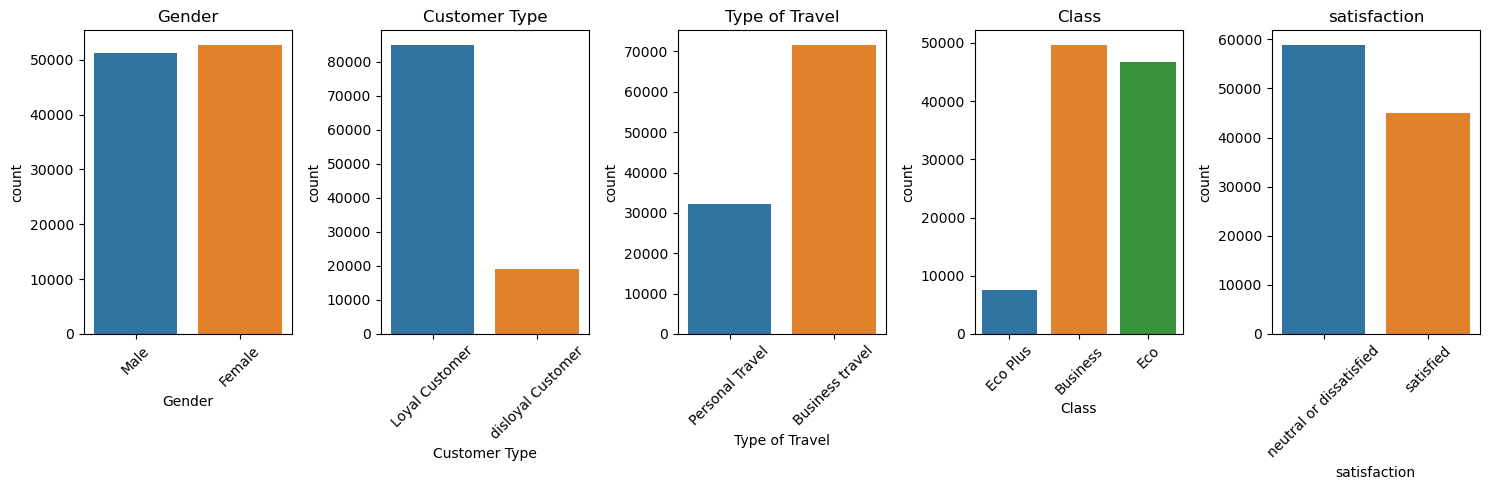

In [274]:
numeric_train = train.select_dtypes(['float', 'int'])
categorical_train = train.select_dtypes(['object'])

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, column in enumerate(categorical_train.columns):
    ax = axes[i]
    sns.countplot(data=categorical_train, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)

    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
- There is an equal number of male and female participants in the survey. </br>
- Most customers on this airline are business travel customers and most of them purchase tickets for Business class, followed by Eco class. </br>
- A large proportion of customers felt neutral or dissatisfied with the airline.
</div>

8. Create some count plots of numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

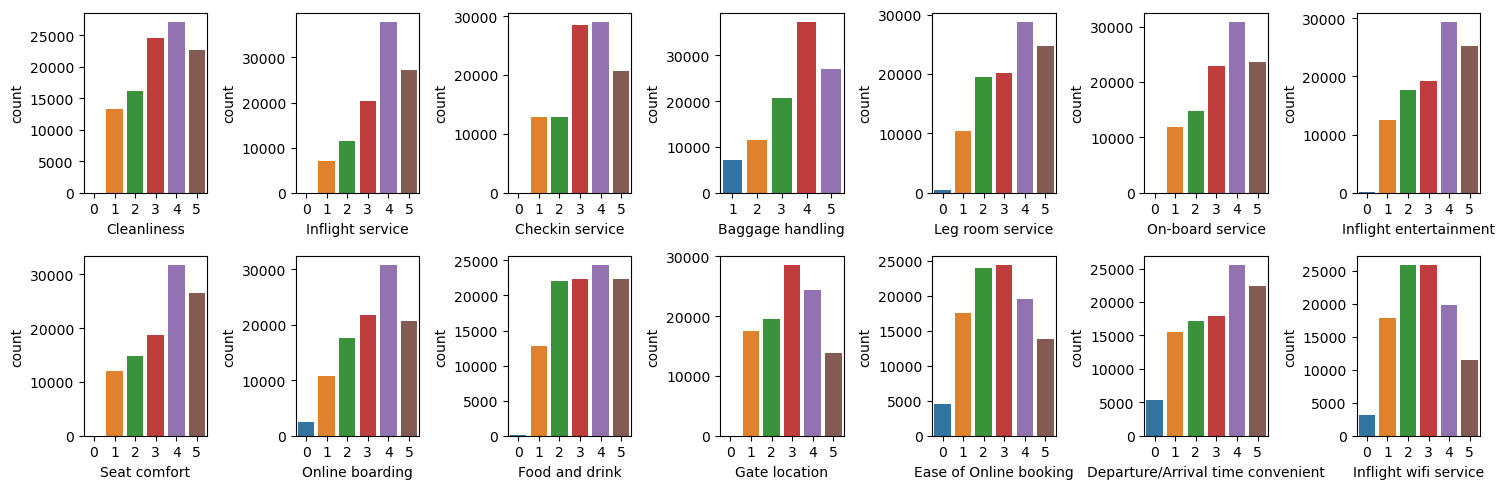

In [275]:
categoric = [
              "Cleanliness", "Inflight service",  "Checkin service", 
             "Baggage handling", "Leg room service", 
             "On-board service", "Inflight entertainment", "Seat comfort", "Online boarding", 
             "Food and drink", "Gate location", "Ease of Online booking", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]


fig, axes = plt.subplots(2, 7, figsize=(15, 5))
for i, column in enumerate(categoric):
    row = i // 7
    col = i % 7
    
    ax = axes[row, col]
    sns.countplot(data=train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

9. Create some Kernel density plots for view the distribution of continuous variables

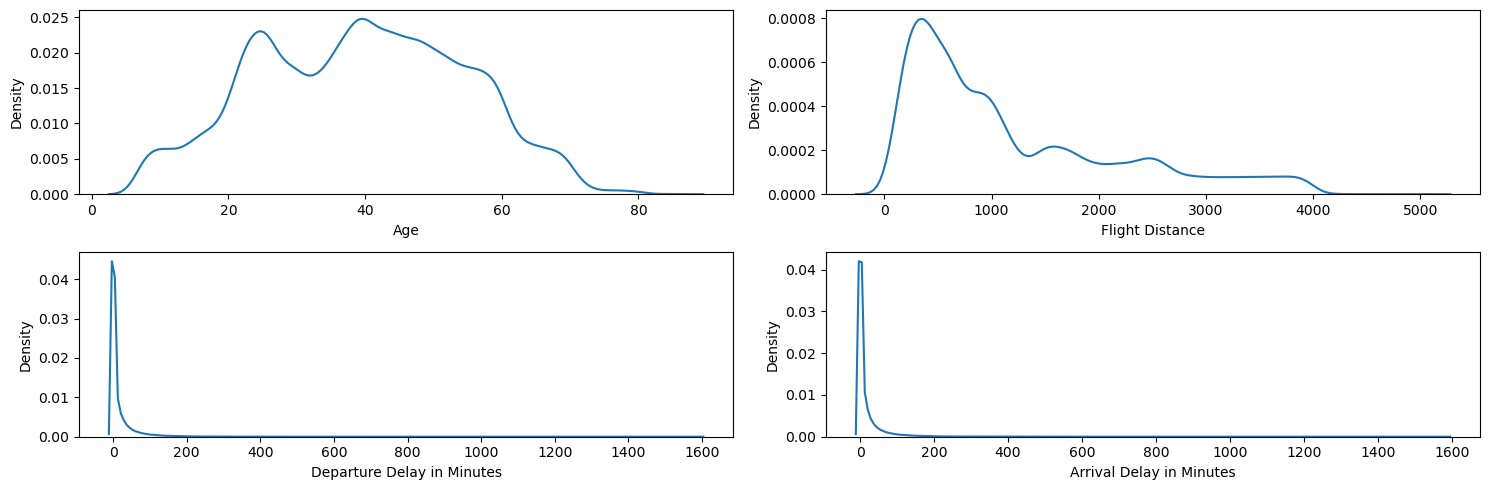

In [276]:
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
The variables "Flight Distance", "Departure Delay in Minutes" and "Arrival Delay in Minutes" are all heavily right-skewed. 
</div>

#### **🛩 Statistical analysis (Chi-square test)**
****
SECTION TO BE DELETED BUT MAKE SURE THAT YOU ADJUST THE CSV FILE BEFORE YOU DELETE

In [277]:
categoric = [
              "Gender", "Customer Type", "Type of Travel", "Class", "satisfaction", "Cleanliness", "Inflight service",  "Checkin service", 
             "Baggage handling", "Leg room service", 
             "On-board service", "Inflight entertainment", "Seat comfort", "Online boarding", 
             "Food and drink", "Gate location", "Ease of Online booking", "Departure/Arrival time convenient",
             "Inflight wifi service"
             ]

categorical_train[categoric] = train[categoric].astype("category")
categorical_train.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Cleanliness,Inflight service,Checkin service,Baggage handling,Leg room service,On-board service,Inflight entertainment,Seat comfort,Online boarding,Food and drink,Gate location,Ease of Online booking,Departure/Arrival time convenient,Inflight wifi service
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,5,5,4,4,3,4,5,5,3,5,1,3,4,3
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,1,4,1,3,5,1,1,1,3,1,3,3,2,3
2,Female,Loyal Customer,Business travel,Business,satisfied,5,4,4,4,3,4,5,5,5,5,2,2,2,2
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,2,4,1,3,5,2,2,2,2,2,5,5,5,2
4,Male,Loyal Customer,Business travel,Business,satisfied,3,3,3,4,4,3,3,5,5,4,3,3,3,3


In [278]:
combi = list(combinations(categorical_train.columns, 2))
not_significant = []

for i in combi:
    table = pd.crosstab(categorical_train[i[0]], categorical_train[i[1]])
    test, p, _, _ = stats.chi2_contingency(table, correction=False)
    if p > 0.05:
        not_significant.append(i[1])

print(f"The variables that have a p-value of greater than 0.05 and thus not significant in prediction of satisfaction are ", not_significant)

The variables that have a p-value of greater than 0.05 and thus not significant in prediction of satisfaction are  ['Inflight entertainment', 'Gate location', 'Ease of Online booking']


#### 🛩 **Statistical analysis (Correlation)**
****

10. Looking to see the correlation between any of the numerical catgories, here we are creating a pandas dataframe onf the numerical categories and the target variable

In [279]:
numeric_df = train[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "satisfaction"]]
numeric_df.head(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,13,460,25,18.0,neutral or dissatisfied
1,25,235,1,6.0,neutral or dissatisfied
2,26,1142,0,0.0,satisfied
3,25,562,11,9.0,neutral or dissatisfied
4,61,214,0,0.0,satisfied
5,26,1180,0,0.0,neutral or dissatisfied
6,47,1276,9,23.0,neutral or dissatisfied
7,52,2035,4,0.0,satisfied
8,41,853,0,0.0,neutral or dissatisfied
9,20,1061,0,0.0,neutral or dissatisfied


11. Drawing out a correlation matrix between the numerical variable to test for multicollinearity

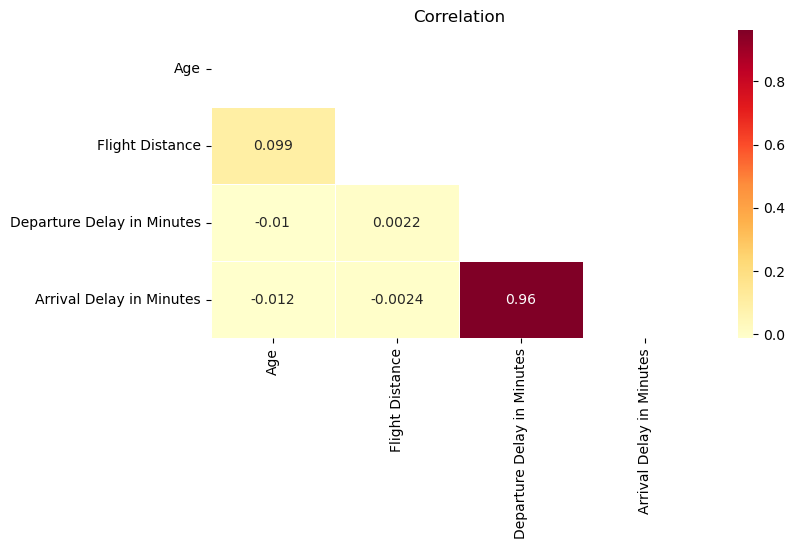

In [280]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Correlation') -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(8, 4))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(numeric_df)

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
"Depature Delay in Minutes" has a large correlation with "Arrival Delay in Minutes" (Correlation = 0.96). We can remove one of the columns from the dataset. We remove "Arrival Delay in Minutes".
</div>

12. After seeing that there is a large correlation between Arrival delay in minutes and departure delay, we have to drop one of them

In [281]:
not_significant.append("Arrival Delay in Minutes")
print(f"The variables that are not significant in prediction of satisfaction are ", not_significant)

The variables that are not significant in prediction of satisfaction are  ['Inflight entertainment', 'Gate location', 'Ease of Online booking', 'Arrival Delay in Minutes']


#### **🛩 Machine learning preparation**
****

In [282]:
clean_train = train.drop(not_significant, axis = 1)
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Food and drink                     103904 non-null  int64 
 9   Online boarding                    103904 non-null  int64 
 10  Seat comfort                       103904 non-null  int64 
 11  On-board service                   103904 non-null  

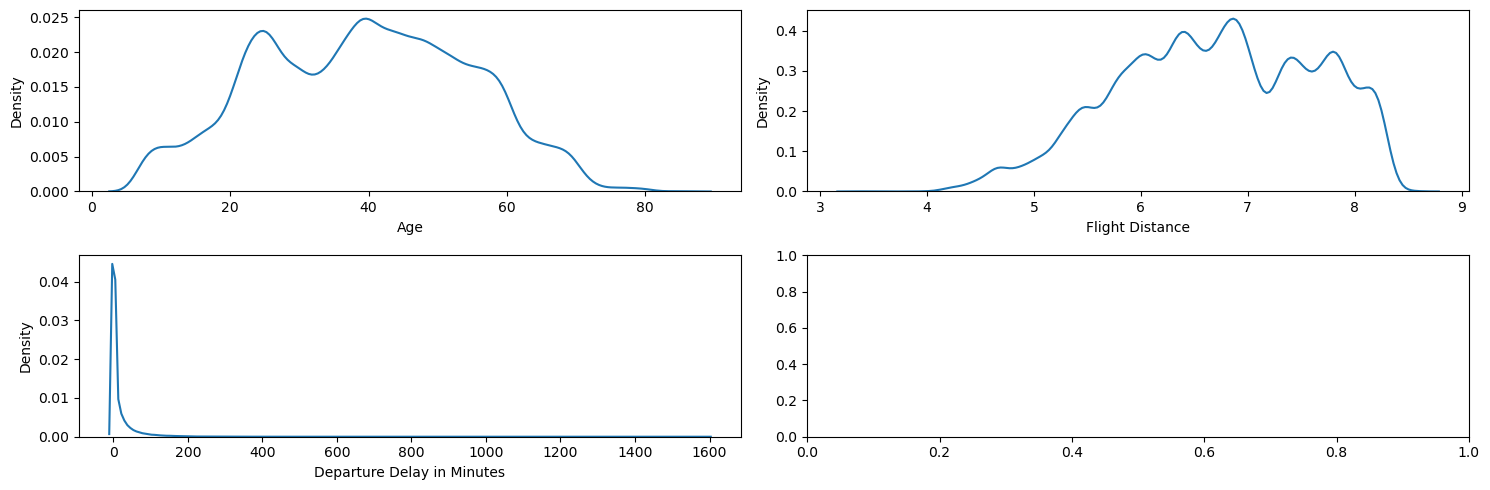

In [283]:
# Normalize the numeric variables 
clean_train["Flight Distance"] = np.log(clean_train["Flight Distance"])
clean_train["Depature Delay in Minutes"] = np.log(clean_train["Departure Delay in Minutes"])

numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data= clean_train, x=column, ax=ax)
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
Although "Departure Delay in Minutes" is still very right skewed, "Fight Distance" is now more normally distribured. 
</div>

In [284]:
clean_train.head() 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Depature Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,6.131226,3,4,5,3,5,4,3,4,4,5,5,25,neutral or dissatisfied,3.218876
1,Male,disloyal Customer,25,Business travel,Business,5.459586,3,2,1,3,1,1,5,3,1,4,1,1,neutral or dissatisfied,0.000000
2,Female,Loyal Customer,26,Business travel,Business,7.040536,2,2,5,5,5,4,3,4,4,4,5,0,satisfied,-inf
3,Female,Loyal Customer,25,Business travel,Business,6.331502,2,5,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied,2.397895
4,Male,Loyal Customer,61,Business travel,Business,5.365976,3,3,4,5,5,3,4,4,3,3,3,0,satisfied,-inf


In [285]:
X = clean_train[['Gender','Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Food and drink', 'Online boarding', 'Seat comfort',
       'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service',
       'Cleanliness', 'Departure Delay in Minutes']]
y = clean_train["satisfaction"]

13. We next need to normalize the numeric variables, this is the process of transforming the variables to a common scale or range to ensure a fair comparison between variables and prevent one variable from dominating others due to its larger magnitude, we will normalize using the standard scalar object

In [286]:
# Scaling
scaler = StandardScaler()
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Check for infinite or extremely large values in X
X_has_inf = np.isinf(X[numeric_col]).any().any()
X_has_large_vals = np.abs(X[numeric_col]) > 1e6
X_has_large_vals = X_has_large_vals.any().any()

# Handle the problematic values in X
if X_has_inf or X_has_large_vals:
    X[numeric_col] = X[numeric_col].replace([np.inf, -np.inf], np.nan)
    X[numeric_col] = X[numeric_col].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

In [287]:
X_has_large_vals.any().any()

False

14. We now want to turn the categorical columns into a machine readable format so it can be interpretted by our model, we do this using the Label encoder object

In [288]:
le = LabelEncoder()
cat_col = ["Gender","Customer Type", "Type of Travel", "Class"]

for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

X = X.iloc[:, :-1]
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness
0,1,0,-1.745279,1,2,-0.624110,3,4,5,3,5,4,3,4,4,5
1,1,1,-0.951360,0,0,-1.356305,3,2,1,3,1,1,5,3,1,1
2,0,0,-0.885200,0,0,0.367182,2,2,5,5,5,4,3,4,4,5
3,0,0,-0.951360,0,0,-0.405778,2,5,2,2,2,2,5,3,1,2
4,1,0,1.430397,0,0,-1.458354,3,3,4,5,5,3,4,4,3,3


15. We also want to do the same thing to our target variable

In [289]:
le = LabelEncoder()
y = le.fit_transform(y)

16. We are then splitting our training dataset into train and a test datasets, this will allow us to evaluate which model is best for predicting, we also cannot use the actual test dataset becuase this results in data leakage, data leakage occurs when information from the testing set is inadvertently used during model training. This can lead to overly optimistic performance estimates

In [290]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train shape: ", X_train.shape)
print(f"X_val shape: ", X_val.shape)

X_train shape:  (83123, 16)
X_val shape:  (20781, 16)


#### **🛩 Modelling**
****

17. Here we create a function that calculates key metrics used to measure the effectiveness of a model

In [291]:
def mod (model):
    accuracy = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(accuracy_score))).mean()
    F1 = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(f1_score))).mean()
    precision = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(precision_score))).mean()
    recall = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(recall_score))).mean()
    auc = (cross_val_score(model, X_train, y_train, cv=5, scoring = make_scorer(roc_auc_score))).mean()
    
    return (accuracy, F1, precision, recall, auc)

18. We test out 5 different machine learning algorithm and compare which of the 5 has the best performance for predicting our test values

In [292]:
models = []

models.append(('Logistic_Reg', LogisticRegression()))
# models.append(('Random_Forest', RandomForestClassifier()))
# models.append(('Gradient_Boost', GradientBoostingClassifier()))
# models.append(('XGBoost', XGBClassifier()))
# models.append(('LGBM', LGBMClassifier()))

models

[('Logistic_Reg', LogisticRegression())]

In [293]:
model_name = []
model_metrics = []

for i in models: 
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))

final = pd.DataFrame(model_metrics, 
                    columns = ['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'], 
                    index = model_name)

final

,Accuracy,F1,Precision,Recall,AUC
Logistic_Reg,0.873994,0.851559,0.869755,0.834148,0.869306


<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
LGBM is the best performing model in terms of F1 score and AUC. 
</div>

19. After deciding that the Light gradient boosting machine algorithm has the best performance, we decide to use this one

In [294]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_val, y_pred)
print("AUC Score:", auc_score)

NameError: name 'LGBMClassifier' is not defined

#### **🛩 Test prediction**
****

20. we now all of our necessary changes to the test dataset that we had previously done to the train dataset as follows:

**a.** drop the columns of id and unnamed: 0


In [ ]:
test = pd.read_csv("/Users/rayanbessadi/Documents/Code/Data science/Data science/Satisfaction/test.csv")
test.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)

test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**b.** Drop all of the columns that are not significant

In [ ]:
clean_test = test.drop(not_significant, axis = 1)
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             25976 non-null  object
 1   Customer Type                      25976 non-null  object
 2   Age                                25976 non-null  int64 
 3   Type of Travel                     25976 non-null  object
 4   Class                              25976 non-null  object
 5   Flight Distance                    25976 non-null  int64 
 6   Inflight wifi service              25976 non-null  int64 
 7   Departure/Arrival time convenient  25976 non-null  int64 
 8   Food and drink                     25976 non-null  int64 
 9   Online boarding                    25976 non-null  int64 
 10  Seat comfort                       25976 non-null  int64 
 11  On-board service                   25976 non-null  int64 
 12  Leg 

**c.** Taking the natural logarithm of the numerical variables that are skewed, the is done to make it more suitable for model predicting and reduce skewedness

In [ ]:
clean_test["Flight Distance"] = np.log(clean_test["Flight Distance"])
clean_test["Depature Delay in Minutes"] = np.log(clean_test["Departure Delay in Minutes"])

**d.** Define the columns for our x and y

In [ ]:
X = clean_test.drop(["satisfaction"], axis = 1)
y = clean_test["satisfaction"]

**e.** We now normalise the numerical variables

In [ ]:
scaler = StandardScaler()
numeric_col = ["Age", "Flight Distance", "Departure Delay in Minutes"]

# Check for infinite or extremely large values in X
X_has_inf = np.isinf(X[numeric_col]).any().any()
X_has_large_vals = np.abs(X[numeric_col]) > 1e6
X_has_large_vals = X_has_large_vals.any().any()

# Handle the problematic values in X
if X_has_inf or X_has_large_vals:
    X[numeric_col] = X[numeric_col].replace([np.inf, -np.inf], np.nan)
    X[numeric_col] = X[numeric_col].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_col].fillna(X[numeric_col].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

**f.** We now encode our categorical variables

In [ ]:
le = LabelEncoder()
cat_col = ["Gender", "Customer Type", "Type of Travel", "Class"]

for cols in cat_col: 
    X[cols] = le.fit_transform(X[cols])

X = X.iloc[:, :-1]
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service
0,1,0,-1.745279,1,2,-0.624110,3,4,5,3,5,4,3,4,4
1,1,1,-0.951360,0,0,-1.356305,3,2,1,3,1,1,5,3,1
2,0,0,-0.885200,0,0,0.367182,2,2,5,5,5,4,3,4,4
3,0,0,-0.951360,0,0,-0.405778,2,5,2,2,2,2,5,3,1
4,1,0,1.430397,0,0,-1.458354,3,3,4,5,5,3,4,4,3


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

21. Lasstly we used our pretrained model to predict whetehr airline passengers were satisfied or not from the test dataset and retreive the key metrics for our model

In [ ]:
y_pred = lgbm.predict(X)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y, y_pred)
print("F1 score:", f1)

auc_score = roc_auc_score(y, y_pred)
print("AUC Score:", auc_score)

NameError: name 'lgbm' is not defined

Please 